In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager


In [4]:
df = pd.read_csv('Data/dataset_futbol_limpio_1.0.csv', delimiter=',', index_col='Player')
print(df.columns)
df


Index(['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Goals',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=121)


,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Player,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,USA,MF,Leeds United,Premier League,22,20,19,1596,17.7,1,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,22,1980,22.0,0,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
Himad Abdelli,FRA,MF,Angers,Ligue 1,23,14,8,770,8.6,0,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,1,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,15,1165,12.9,0,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,2,0,32,0.4,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1,0,8,0.1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,20,20,1684,18.7,8,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9


-Ahora, para hacer gráficos para ver las estadisticas de cada jugador respecto a los demas.
Vamos a calcular los percentiles de cada jugador en las estadisticas que le pasemos

In [5]:

def calcular_percentiles(jugador, caracteristicas):

    posicion = df.loc[jugador, 'Pos']
    df_posicion = df[df['Pos'] == posicion]
    percentiles = []
    
    for caracteristica in caracteristicas:
        valor_jugador = df.loc[jugador, caracteristica]
        percentil = (df_posicion[caracteristica] < valor_jugador).mean() * 100
        percentiles.append(percentil.astype('int64'))
    
    return percentiles


In [6]:
jugador = "Lionel Messi"
caracteristicas = ["Goals", "Assists", "Touches", "SoT"]
percentiles = calcular_percentiles(jugador, caracteristicas)
print(f"Percentiles de {jugador}: {percentiles}")


Percentiles de Lionel Messi: [99, 98, 90, 97]


In [7]:

def individual_chart(jugador, caracteristicas):
    
    # Calcular los percentiles
    percentiles = calcular_percentiles(jugador, caracteristicas)
    
    slice_colors = ["#1A78CF"] * len(caracteristicas)
    text_colors = ["#000000"] * len(caracteristicas)

    baker = PyPizza(
        params=caracteristicas,
        background_color="#EBEBE9",
        straight_line_color="#EBEBE9",
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=20
    )

    fig, ax = baker.make_pizza(
        percentiles,
        figsize=(8, 8.5),
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#F2F2F2", zorder=2, linewidth=1),
        kwargs_params=dict(color="#000000", fontsize=12, va="center"),
        kwargs_values=dict(color="#000000", fontsize=12, zorder=3,
                           bbox=dict(edgecolor="#000000", facecolor="cornflowerblue",
                                     boxstyle="round,pad=0.2", lw=1))
    )

    

    #Aqui obtenemos aquellos datos que queremos mostrar en el grafico
    equipo = df.loc[jugador, 'Squad']
    posicion = df.loc[jugador, 'Pos']
    minutos = df.loc[jugador, 'Min']
    partidos = df.loc[jugador, 'MP']
    
    #Aqui añadimos la informacion de minutos y partidos
    fig.text(
        0.02, 0.02,
        f"Mins played: {minutos}\nMatches played: {partidos}",
        size=10,
        ha="left",
        va="bottom",
        color="#000000"
    )

    #Titulo del grafico
    fig.text(
        0.515, 0.975, f"{jugador} - {equipo}", size=16,
        ha="center",color="#000000"
    )

    #Subtitulo del grafico
    fig.text(
        0.515, 0.953,
        f"Percentil vs players of the same position of the Top 5 Leagues | First Half of the Season 2022-23",
        size=13,
        ha="center",color="#000000"
    )

    return fig, ax


-Ejemplos de uso:

(<Figure size 800x850 with 1 Axes>, <PolarAxes: >)

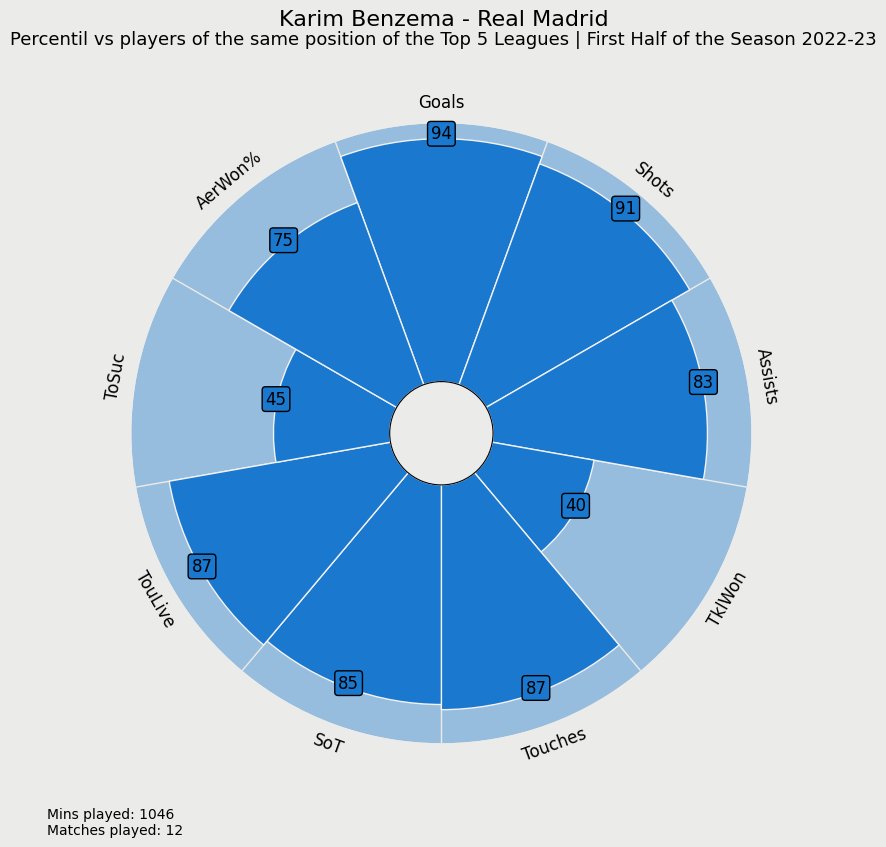

In [8]:
jugador = "Karim Benzema"
caracteristicas = ['Goals', 'Shots','Assists','TklWon','Touches','SoT', 'TouLive', 'ToSuc','AerWon%']

individual_chart(jugador, caracteristicas)

(<Figure size 800x850 with 1 Axes>, <PolarAxes: >)

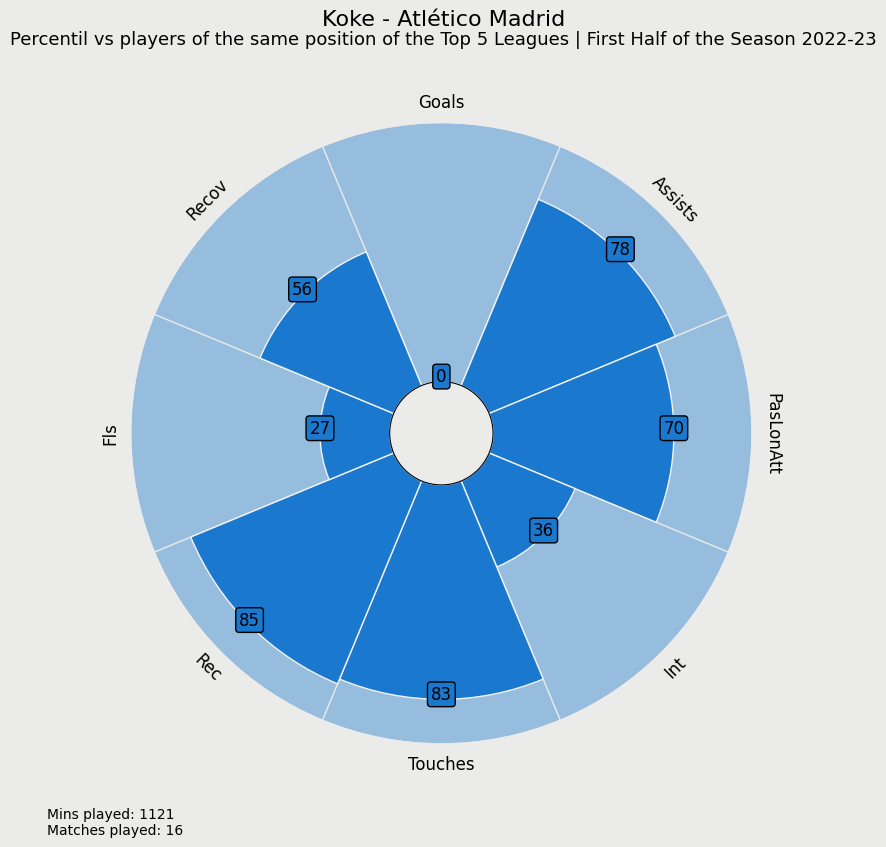

In [9]:
jugador = "Koke"
caracteristicas = ['Goals', 'Assists', 'PasLonAtt', 'Int', 'Touches', 'Rec', 'Fls', 'Recov']
individual_chart(jugador, caracteristicas) 

(<Figure size 800x850 with 1 Axes>, <PolarAxes: >)

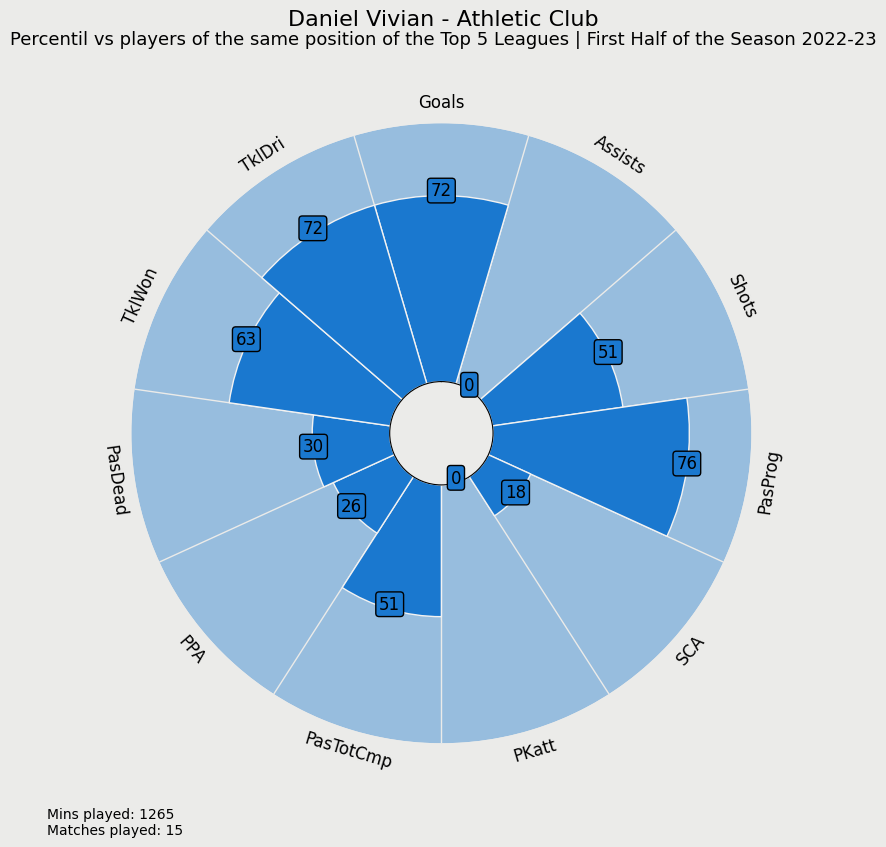

In [10]:
jugador = "Daniel Vivian"
caracteristicas = ['Goals', 'Assists', 'Shots', 'PasProg', 'SCA', 'PKatt', 'PasTotCmp', 'PPA', 'PasDead', 'TklWon', 'TklDri']
individual_chart(jugador, caracteristicas) 